### Car Data Import and Cleanup

We begin by importing all of the data and reviewing descriptive statistics. 

In [4]:
%config IPCompleter.greedy=True
import pandas as pd
import numpy as np

#Changing the location of this to maintain portability
#kick_data = pd.read_csv('/Users/chandlervaughn/Dropbox/4. Chandler/Development/Machine Learning/Lab1/kick.csv')
kick_data=pd.read_csv("https://www.dropbox.com/s/q2h8uypvc0et5vj/kick.csv?dl=1")

In [6]:
import seaborn as sns

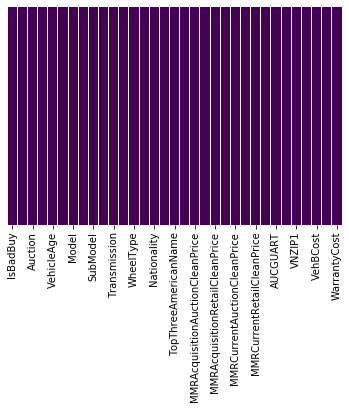

In [7]:
sns.heatmap(kick_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

### 1.3.2 Data Cleanup and Imputation

In [8]:
#drop columns that have too little information to be useful
try:
    kick_data = kick_data.drop(['PRIMEUNIT', 'AUCGUART'],axis=1)
except:
    print("Columns not found. Drop has already been performed.")


#should be floats
continuous_features = ['VehOdo', 'MMRAcquisitionAuctionAveragePrice',
                      'MMRAcquisitionAuctionCleanPrice',
                      'MMRAcquisitionRetailAveragePrice',
                      'MMRAcquisitionRetailCleanPrice',
                      'MMRCurrentAuctionAveragePrice',
                      'MMRCurrentAuctionCleanPrice',
                      'MMRCurrentRetailAveragePrice',
                      'MMRCurrentRetailCleanPrice',
                      'VehBCost',
                      'WarrantyCost']

#should be int
ordinal_features = ['IsBadBuy', 'PurchDate', 'VehYear',
                    'VehicleAge', 'WheelTypeID', 'BYRNO',
                    'VNZIP1', 'IsOnlineSale']

#should be categorical
categorical_features = ['Auction', 'Make', 'Model', 'Trim',
                       'SubModel', 'Color', 'Transmission',
                       'WheelType', 'Nationality', 'Size',
                       'TopThreeAmericanName',# 'PRIMEUNIT','AUCGUART',
                        'VNST']

#replace ? data with Nan so we can properly aggregate
kick_data[continuous_features] = kick_data[continuous_features].replace(to_replace='?', value = -9999999)
kick_data[ordinal_features] = kick_data[ordinal_features].replace(to_replace='?', value = -9999999)
kick_data[categorical_features] = kick_data[categorical_features].replace(to_replace='?', value = 'UNKNOWN')

kick_data[continuous_features] = kick_data[continuous_features].astype(np.float64)
kick_data[ordinal_features] = kick_data[ordinal_features].astype(np.int64)

kick_data[continuous_features] = kick_data[continuous_features].replace(to_replace=-9999999, value = np.nan)
kick_data[ordinal_features] = kick_data[ordinal_features].replace(to_replace=-9999999, value = np.nan)

In [41]:
#Impute missing values

kick_mean = kick_data[continuous_features].mean()
kick_median = kick_data[categorical_features+ordinal_features].median()
cat_series = pd.concat((kick_mean, kick_median))
kick_imputed = kick_data.fillna(value=cat_series)

kick_imputed[continuous_features] = kick_imputed[continuous_features].astype(np.float64)
kick_imputed[ordinal_features] = kick_imputed[ordinal_features].astype(np.int64)
#review imputed dataframe
#detail_describe(kick_imputed).transpose()

In [42]:
#------------------------------------------------------------------------------
# accept a dataframe, show outliers
# see http://www.itl.nist.gov/div898/handbook/prc/section1/prc16.htm
#------------------------------------------------------------------------------
def show_outliers(df_in, col_name):
    q1 = df_in[col_name].quantile(0.05)
    q3 = df_in[col_name].quantile(0.95)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = pd.concat([df_in.loc[(df_in[col_name] < fence_low)], df_in.loc[(df_in[col_name] > fence_high)]])
    return df_out


outlier_datapoints = pd.concat([show_outliers(kick_data,'VehBCost'), show_outliers(kick_data,'WarrantyCost')])
outlier_datapoints

,IsBadBuy,PurchDate,Auction,VehYear,VehicleAge,Make,Model,Trim,SubModel,Color,...,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost
6031,1,1290470400,MANHEIM,2007,3,LEXUS,GS450H,UNKNOWN,4D SEDAN HYBRID,BLACK,...,23400.0,26462.0,29752.0,33337.0,835,85040,AZ,28560.0,0,1121.0
15308,1,1274832000,MANHEIM,2008,2,LEXUS,RX400H AWD,UNKNOWN,4D SPORT UTILITY,GREY,...,31127.0,34798.0,38151.0,41062.0,835,94544,CA,36485.0,0,1001.0
22276,1,1254268800,MANHEIM,2008,1,TOYOTA,HIGHLANDER 4WD V6,Lim,4D SPORT UTILITY HYBRID LIMITED,BLACK,...,35722.0,36859.0,39080.0,40308.0,23359,92807,CA,35900.0,0,702.0
23450,1,1270598400,MANHEIM,2007,3,TOYOTA,FJ CRUISER 4WD V6,UNKNOWN,2D SPORT UTILITY,MAROON,...,18837.0,20348.0,22679.0,25175.0,23359,92807,CA,20380.0,0,522.0
37050,1,1276646400,MANHEIM,2007,3,INFINITI,M35,Bas,4D SEDAN,GREY,...,21940.0,24293.0,27269.0,30194.0,19064,75236,TX,20100.0,0,1020.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72432,1,1234915200,ADESA,2003,6,CHEVROLET,VENTURE FWD V6 3.4L,LS,PASSENGER 3.4L,MAROON,...,3945.0,4678.0,4761.0,5552.0,18881,30212,GA,4000.0,0,5392.0
72524,1,1236643200,ADESA,2002,7,CHEVROLET,VENTURE FWD V6 3.4L,LS,PASSENGER EXT 3.4L WARNER BROS,BLACK,...,2821.0,3460.0,3547.0,4237.0,18111,30212,GA,4750.0,0,4922.0
72604,0,1238544000,ADESA,2002,7,PONTIAC,MONTANA 3.4L V6 EFI,UNKNOWN,4D MINIVAN 3.4L VALUE,WHITE,...,2591.0,3352.0,3298.0,4120.0,18111,30212,GA,3500.0,0,5913.0
72903,0,1254355200,ADESA,2004,5,CHEVROLET,VENTURE FWD V6 3.4L,LS,PASSENGER 3.4L,GREEN,...,2109.0,3469.0,2778.0,4247.0,18111,30212,GA,4200.0,0,5613.0


### 1.3.3 Standardization - Rescaling All Continuous Variables

In [43]:
# add mileage (added 9-27-19)
kick_imputed.VehOdo=kick_data.VehOdo.fillna("0")
kick_imputed.VehicleAge=kick_data.VehicleAge.fillna("1")
col1 = 'VehOdo'
col2 = 'VehicleAge'
conditions  = [ (kick_imputed[col1]/kick_imputed[col2]) < 10000, ((kick_imputed[col1]/kick_imputed[col2]) < 13867) & ((kick_imputed[col1]/kick_imputed[col2]) > 10000), (kick_imputed[col1]/kick_imputed[col2]) > 13867 ]
choices     = [ "LOW", 'GOOD', 'HIGH' ]
kick_imputed["Mileage"] = np.select(conditions, choices, default=np.nan)

#Dropping correlated values
kick_imputed = kick_imputed.drop(['MMRAcquisitionAuctionCleanPrice', 'MMRAcquisitionRetailCleanPrice'], axis=1)
kick_imputed = kick_imputed.drop(['MMRCurrentAuctionAveragePrice', 'MMRCurrentRetailAveragePrice'], axis=1)
kick_imputed = kick_imputed.drop(['MMRCurrentRetailCleanPrice', 'MMRCurrentAuctionCleanPrice'], axis=1)

#Compare the Make field against the list of previously identified luxury automakers in this dataset.    
kick_imputed.columns = kick_imputed.columns.str.replace(' ', '')
temp=kick_imputed.Make.fillna("0")
kick_imputed['Luxury'] = pd.np.where(temp.str.contains("LEXUS"),1,
                   pd.np.where(temp.str.contains("CADILLAC"), 1,
                   pd.np.where(temp.str.contains("LINCOLN"), 1, 
                   pd.np.where(temp.str.contains("INFINITI"), 1, 0))))   


kick_imputed['Axle'] = pd.np.where(temp.str.contains("2WD"),"2WD",
                     pd.np.where(temp.str.contains("4WD"), "4WD",
                     pd.np.where(temp.str.contains("FWD"), "FWD",
                     pd.np.where(temp.str.contains("AWD"), "AWD", "Unknown"))))

#add cylinder (added 9-27-19)
kick_imputed['Cylinder'] = pd.np.where(temp.str.contains("V6"),"V6",
                   pd.np.where(temp.str.contains("6C"), "V6",
                   pd.np.where(temp.str.contains("4C"), "V4", 
                   pd.np.where(temp.str.contains("8C"), "V8",            
                   pd.np.where(temp.str.contains("V4"), "V4",
                   pd.np.where(temp.str.contains("V8"), "V8", "Unknown"))))))
